# Evaluation of implicit models + discrete VAE.

## Theory

### Problem 1: Neural ODE vs backprop (2pt)

At Lecture 12 we have discussed [Neural ODE](https://arxiv.org/pdf/1806.07366.pdf) model. There we used the adjoint state functions
$$
	\mathbf{a}_{\mathbf{z}}(t) = \frac{\partial L(\mathbf{y})}{\partial \mathbf{z}(t)}; \quad \mathbf{a}_{\boldsymbol{\theta}}(t) = \frac{\partial L(\mathbf{y})}{\partial \boldsymbol{\theta}(t)}.
$$

These two functions allowed to derive continuous version of backpropagation algorithm.

The formulas for the method are given by Pontryagin theorem. It claims that
$$
	\frac{d \mathbf{a}_{\mathbf{z}}(t)}{dt} = - \mathbf{a}_{\mathbf{z}}(t)^T \cdot \frac{\partial f(\mathbf{z}(t), t, \boldsymbol{\theta})}{\partial \mathbf{z}}; \quad \frac{d \mathbf{a}_{\boldsymbol{\theta}}(t)}{dt} = - \mathbf{a}_{\mathbf{z}}(t)^T \cdot \frac{\partial f(\mathbf{z}(t), t, \boldsymbol{\theta})}{\partial \boldsymbol{\theta}}.
$$

Your task here is to verify that the ODE for $\mathbf{a}_{\mathbf{z}}$ leads to the standard backpropagation algorithm for the ResNet block if we use discretization.

**Hints**: you have to use 2 facts

1. ResNet forward path: $\mathbf{z}(t + 1) = \mathbf{z}(t) + f(\mathbf{z}(t), t, \boldsymbol{\theta})$.

2. Finite difference approximation of the derivative (for $\varepsilon = 1$):
$$
    \frac{d \mathbf{a}_{\mathbf{z}}(t)}{dt} \approx \frac{\mathbf{a}_{\mathbf{z}}(t + \varepsilon) - \mathbf{a}_{\mathbf{z}}(t)}{\varepsilon}
$$
3. Standard backpropagation based on the relation between $\frac{\partial L(\mathbf{y})}{\partial \mathbf{z}(t)}$ and $\frac{\partial L(\mathbf{y})}{\partial \mathbf{z}(t + 1)}$ (the relation is given by the chain rule).

🥸🥸🥸🥸🥸🥸🥸🥸

Рассмотрим $\cfrac{dL}{dz(t)} = \cfrac{dL}{dz(t+\epsilon)}\cfrac{dz(t + \epsilon)}{dz(t)} = a_z(t + \epsilon) \cfrac{dz(t + \epsilon)}{dz(t)}$


$z(t + \epsilon) = \int\limits_{t}^{t+\epsilon} f(z(t), t, θ)dt + z(t) := T_{\epsilon}(z(t), t) \Rightarrow \cfrac{dz(t + \epsilon)}{dz(t)} = \cfrac{dT_{\epsilon}(z(t), t)}{dz(t)}$

Тогда 

$a_z(t + \epsilon) \cfrac{dT_{\epsilon}(z(t), t)}{dz(t)} = a(t) = \cfrac{dL}{dz(t)} \Rightarrow \text{we can use} \frac{d \mathbf{a}_{\mathbf{z}}(t)}{dt} = - \mathbf{a}_{\mathbf{z}}(t)^T \cdot \frac{\partial f(\mathbf{z}(t), t, \boldsymbol{\theta})}{\partial \mathbf{z}}$

### Problem 2: Gumbel-Max trick (2pt)

In this problem you have to prove the Gumbel-Max trick that we have discussed on the Lecture 12. 

Let $\pi_1, \pi_2, \dots \pi_K, \in (0, 1)$ and $\sum\limits_{k = 1}^{K} \pi_k = 1$. Consider the discrete random variable:

$$
  c = \arg\max_{k} \left[\log \pi_k + g_k\right].
$$

In the formula above $g_k$ ($k \in \{1, \dots K\}$) are independent random variables distributed following the $\text{Gumbel}(0, 1)$ distribution ([wiki](https://en.wikipedia.org/wiki/Gumbel_distribution)), i.e. $g_k \sim \text{Gumbel}(0, 1)$.

Note that $g_k = - \log (- \log u)$, where $u \sim \text{Uniform}[0, 1]$.

Our goal is to prove that $c \sim \text{Categorical}(\pi_1, \dots \pi_K)$.

1. Find cumulative distribution function ($F_{g}(x) = P(g < x)$) of Gumbel distribution.

2. Find density of the Gumbel distribution (derivative of cdf).

3. Consider random variables $\zeta_k = \log \pi_k + g_k$. Let's fix $k^* \in \{1, \dots K\}$ and look at the following probability $P\bigl( \{\zeta_{k} \leq \zeta_{k^*}\} \text{ for all } k \neq k^*\bigr)$. Prove that 

$$
  P\bigl( \bigcap\limits_{k \neq k^*} \{\zeta_{k} \leq \zeta_{k^*}\}\bigr) = \pi_{k^*}.
$$


1. $P(g < x) = P(-log(-log(u)) < x) = P(-log(u) > e^{-x}) = P(log(u) < -e^{-x}) = P(u < e^{-e^{-x}}) = e^{-e^{-x}}$, так как $u$ из стандартного равномерного распределения

2. $f = \cfrac{dF}{dx} = e^{-e^{-x}} \cfrac{-e^{-x}}{dx} = e^{-e^{-x} - x}$

3. $P\bigl( \bigcap\limits_{k \neq k^*} \{\zeta_{k} \leq \zeta_{k^*}\}\bigr)  = P(\zeta_k \leq \zeta_{k^*}) \quad \forall k \neq k^* = \int\limits_{-\infty}^\infty P(\zeta_k \leq \zeta_{k^*} \forall k) P(\zeta_{k^*}) d\zeta_{k^*} = 
\int\limits_{-\infty}^\infty \prod_{k \neq k^*}P(\zeta_k \leq \zeta_{k^*} ) P(\zeta_{k^*}) d\zeta_{k^*} = \quad
\int\limits_{-\infty}^\infty \prod_{k \neq k^*}P(g_k \leq \zeta_{k^*} - \log{\pi_k} ) P(\zeta_{k^*}) d\zeta_{k^*} =
\int\limits_{-\infty}^\infty \prod_{k \neq k^*}e^{-e^{log(\pi_k) - \zeta_{k^*}}} P(g_{k^*}) d\zeta_{k^*} = 
\int\limits_{-\infty}^\infty \prod_{k \neq k^*}e^{-e^{log(\pi_k) - \zeta_{k^*}}} P(\zeta_{k^*} - \log{\pi_{k^*}}) d\zeta_{k^*} = 
\int\limits_{-\infty}^\infty \prod_{k \neq k^*}e^{-e^{log(\pi_k) - \zeta_{k^*}}} e^{-(\zeta_{k^*} - \log{\pi_{k^*}} + e^{-(\zeta_{k^*} - \log{\pi_{k^*}})}}d\zeta_{k^*} = 
\int\limits_{-\infty}^\infty e^{-\sum\limits_{k \neq k^*} e^{log(\pi_k) - \zeta_{k^*}}} \pi_{k^*}e^{-\zeta_{k^*} + \pi_{k^*}e^{-\zeta_{k^*}}}d\zeta_{k^*} =
\int\limits_{-\infty}^\infty e^{-\sum\limits_{k \neq k^*} \pi_k e^{ - \zeta_{k^*}}} \pi_{k^*}e^{-\zeta_{k^*} + \pi_{k^*}e^{-\zeta_{k^*}}}d\zeta_{k^*} =
\pi_{k^*} \int\limits_{-\infty}^\infty e^{-\zeta_{k^*} - e^{-\zeta_{k^*}} \sum\limits_{k \neq k^*} \pi_k + \pi_{k^*}}d\zeta_{k^*} = 
\pi_{k^*} \int\limits_{-\infty}^\infty e^{-\zeta_{k^*} - e^{-\zeta_{k^*}}}d\zeta_{k^*} = 
\pi_{k^*} \int\limits_{-\infty}^\infty e^{-g_{k^*} - e^{-g_{k^*}}} dg_{k^*} = 
\pi_{k^*} \quad
\blacksquare$

In [ ]:
!pip install --upgrade --no-cache-dir gdown

REPO_NAME = "2022-2023-DGM-AIMasters-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!mv ./{REPO_NAME}/homeworks/stylegan.py ./stylegan.py
!mv ./{REPO_NAME}/homeworks/inception.py ./inception.py
!rm -Rf {REPO_NAME}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Cloning into '2022-2023-DGM-AIMasters-course'...
remote: Enumerating objects: 1302, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 1302 (delta 0), reused 3 (delta 0), pack-reused 1293
Receiving objects: 100% (1302/1302), 534.08 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (523/523), done.
Checking out files: 100% (415/415), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./2022-2023-DGM-AIMasters-course/homeworks
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your package

In [ ]:
from dgm_utils import train_model, show_samples, plot_training_curves
from dgm_utils import visualize_images, load_pickle

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.nn import functional as F
from inception import InceptionV3

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False


def reset_seed():
    OUTPUT_SEED = 0xBADBEEF
    torch.manual_seed(OUTPUT_SEED)
    np.random.seed(OUTPUT_SEED)


USE_CUDA = torch.cuda.is_available()

print("cuda is available:", USE_CUDA)

cuda is available: True


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

## Inception Score and FID 

Here our goal is to understand how to evaluate likelihood-free models using [Inception Score](https://arxiv.org/pdf/1606.03498.pdf) and [Frechet Inception Distance](https://arxiv.org/pdf/1706.08500.pdf).

In [ ]:
def plot_losses(losses, title):
    n_itr = len(losses)
    xs = np.arange(n_itr)

    plt.figure(figsize=(7, 5))
    plt.plot(xs, losses)
    plt.title(title, fontsize=14)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Loss", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


def resize_tensor(x, image_size):
    return F.interpolate(
        x, size=(image_size, image_size), mode="bilinear", align_corners=False
    )

In [ ]:
# loading models checkpoints
!gdown --id 1bTDbmleLXowuGcahsoSBeihSVbGgW52X
!gdown --id 1PNeESbetxazQkBJbBnoizyWgGKJwfpW5

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bTDbmleLXowuGcahsoSBeihSVbGgW52X
To: /content/stylegan_wgangp_loss_FINAL.pth
100% 1.36M/1.36M [00:00<00:00, 165MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PNeESbetxazQkBJbBnoizyWgGKJwfpW5
To: /content/stylegan_gan_r1_loss_FINAL.pth
100% 1.36M/1.36M [00:00<00:00, 144MB/s]


In [ ]:
from stylegan import MicroStyleGANGenerator
from copy import deepcopy

sg_wgangp_name = "stylegan_wgangp_loss_FINAL.pth"
sg_gan_r1_name = "stylegan_gan_r1_loss_FINAL.pth"


stylegan_wgangp = MicroStyleGANGenerator(
    z_dim=128,
    map_hidden_dim=256,
    w_dim=64,
    in_chan=64,
    out_chan=3,
    kernel_size=3,
    hidden_chan=32,
)

stylegan_r1 = deepcopy(stylegan_wgangp)

stylegan_wgangp.load_state_dict(
    torch.load("./{}".format(sg_wgangp_name), map_location="cpu")["generator"]
)

stylegan_r1.load_state_dict(
    torch.load("./{}".format(sg_gan_r1_name), map_location="cpu")["generator"]
)

<All keys matched successfully>

Let's look at model samples from `stylegan_r1`.

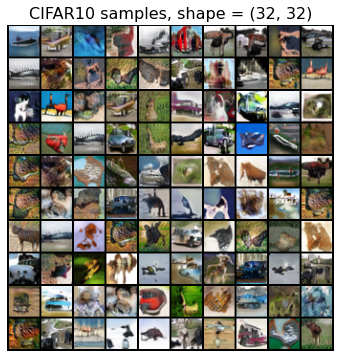

In [ ]:
batch = stylegan_r1.sample(100).detach().cpu().numpy()
show_samples(batch, "CIFAR10 samples, shape = ({0}, {0})".format(32), nrow=10)

Let's look at model samples from `stylegan_wgangp`.

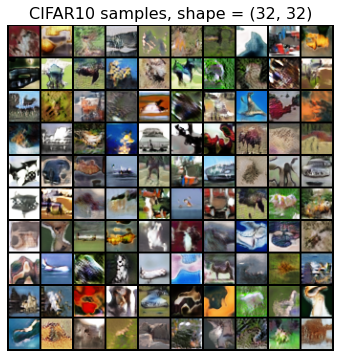

In [ ]:
batch = stylegan_wgangp.sample(100).detach().cpu().numpy()
show_samples(batch, "CIFAR10 samples, shape = ({0}, {0})".format(32), nrow=10)

###  Inception Score

The formula for Inception Score is
$$
    \text{IS} = \exp \bigl( \mathbb{E}_{\mathbf{x}} KL(p(y | \mathbf{x}) || p(y)) \bigr),
$$

where 
* $p(y | \mathbf{x})$ is a pretrained classification model with labels $y$ (we will use [Inception V3 model](https://pytorch.org/vision/main/generated/torchvision.models.inception_v3.html));
* $p(y) = \int p(y | \mathbf{x}) p(\mathbf{x}) d \mathbf{x}$ is a marginal distribution on labels.

In order to calculate the **Inception** score we will use `InceptionV3` last layer activations (those before computing `Softmax`). The dimensionality of these activations is $1008$.


In [ ]:
DIMS = 1008
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
inception_model_act5 = InceptionV3([block_idx])
if USE_CUDA:
    inception_model_act5 = inception_model_act5.cuda()
inception_model_act5.eval()

We need to get class probabilities from our classification model.

In [ ]:
def get_inception_probs(x, model):
    out = model(x)
    probs = nn.functional.softmax(out, dim=1)
    # ====
    return probs.data.cpu().numpy()

In [ ]:
def test_get_inception_probs():
    x = torch.zeros(size=(1, 3, 10, 10))
    if USE_CUDA:
        x = x.cuda()
    probs = get_inception_probs(x, inception_model_act5)
    true_probs = np.array(
        [
            0.00012616384,
            0.00031305864,
            0.00019984621,
            0.00024997862,
            0.00005619833,
            0.00010180601,
            0.00002303111,
            0.0001946776,
            0.0015921608,
            0.000064336535,
        ]
    )
    assert np.allclose(probs[0, :10], true_probs)


test_get_inception_probs()

In [ ]:
def generate_fake_images_stylegan(sg_generator, n_samples, batch_size):
    fake_images = []
    for i in range(n_samples // batch_size):
        fake_samples = sg_generator.sample(batch_size).cpu().detach().numpy()
        fake_images.extend(fake_samples)

    fake_samples = sg_generator.sample(n_samples % batch_size).cpu().detach().numpy()
    fake_images.extend(fake_samples)
    return np.array(fake_images)

It is the main function for getting Inception Score.

In [ ]:
def get_inception_score(
    generator, inception_model, n_samples, batch_size=32, splits=10
):
    if USE_CUDA:
        generator = generator.cuda()
        inception_model = inception_model.cuda()

    generator.eval()
    inception_model.eval()

    fake_images = generate_fake_images_stylegan(generator, n_samples, batch_size)
    loader = torch.utils.data.DataLoader(fake_images, batch_size=batch_size)

    probs_ls = []
    for batch in loader:
        cur_fake_imgs = torch.tensor(batch).cuda()
        # print(cur_fake_imgs.device)
        probs = get_inception_probs(cur_fake_imgs, inception_model)
        probs_ls.append(probs)

    probs = np.vstack(probs_ls)
    # print(probs.shape)
    # ====

    split_scores = []

    for k in range(splits):
        part = probs[k * (n_samples // splits) : (k + 1) * (n_samples // splits), :]
        cur_py = np.mean(part, axis=0)
        KL = entropy(part, cur_py, axis=1)
        # print(KL)
        split_score = np.exp(np.mean(KL))
        # print(split_score)

        # ====
        split_scores.append(split_score)

    # print(split_scores)

    return np.mean(split_scores)

In [ ]:
N_SAMPLES = 1000
BATCH_SIZE = 16
SPLITS = 5

reset_seed()

IS_stylegan_r1 = get_inception_score(
    generator=stylegan_r1,
    inception_model=inception_model_act5,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    splits=SPLITS,
)

reset_seed()

IS_stylegan_wgangp = get_inception_score(
    generator=stylegan_wgangp,
    inception_model=inception_model_act5,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    splits=SPLITS,
)

<ipython-input-55-44f8cc6f2c9b>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cur_fake_imgs  = torch.tensor(batch).cuda()


In [ ]:
assert np.allclose(IS_stylegan_r1, 6.566, atol=0.1)
assert np.allclose(IS_stylegan_wgangp, 6.63, atol=0.1)

###  Frechet Inception Distance

Now we will implement Frechet Inception Distance:

$$
	\text{FID} (\pi, p) = \| \mathbf{m}_{\pi} - \mathbf{m}_{p}\|_2^2 + \text{Tr} \left( \boldsymbol{\Sigma}_{\pi} + \boldsymbol{\Sigma}_p - 2 \sqrt{\boldsymbol{\Sigma}_{\pi} \boldsymbol{\Sigma}_p} \right)
$$

* Representations are the outputs of the intermediate layer from the pretrained classification model (we will use the activations of the last by one layer of `InceptionV3` (which have dimensionality $(2048, 1, 1)$), that's why the last two dimensions should be dropped before FID statistics calculation).
* $\mathbf{m}_{\pi}$, $\boldsymbol{\Sigma}_{\pi} $ are the mean vector and the covariance matrix of feature representations for samples from $\pi(\mathbf{x})$
* $\mathbf{m}_{p}$, $\boldsymbol{\Sigma}_p$ are the mean vector and the covariance matrix of feature representations for samples from $p(\mathbf{x} | \boldsymbol{\theta})$.

In [ ]:
DIMS = 2048
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
inception_model_act4 = InceptionV3([block_idx])
if USE_CUDA:
    inception_model_act4 = inception_model_act4.cuda()
inception_model_act4.eval()

InceptionV3(
  (blocks): ModuleList(
    (0): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      

Here we need samples from the ground truth distribution $\pi(\mathbf{x})$ (`CIFAR10` images).

In [ ]:
!gdown --id 1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj
To: /content/cifar10.pkl
100% 185M/185M [00:06<00:00, 28.6MB/s]


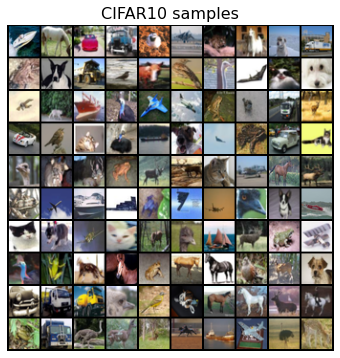

In [ ]:
train_data, test_data = load_pickle("./cifar10.pkl")
visualize_images(train_data, "CIFAR10 samples")

In [ ]:
def get_matrix_sqrt(x):
    y = x.cpu().detach().numpy()
    y = scipy.linalg.sqrtm(y)
    if not np.isfinite(y).all():
        print("bad!")
    return torch.Tensor(y.real, device=x.device)

In [ ]:
def get_distance(mu_x, mu_y, sigma_x, sigma_y):
    # ====
    # your code

    squared_norm = (mu_y - mu_x) @ (mu_y - mu_x)
    sigma_staff = torch.trace(
        sigma_y + sigma_x - 2 * get_matrix_sqrt(sigma_y @ sigma_x)
    )

    return squared_norm + sigma_staff

    # ====


def test_get_distance():
    mu_x = torch.ones(3)
    mu_y = torch.ones(3) * 10
    sigma_x = torch.eye(3) * 5
    sigma_y = torch.eye(3) * 3
    dist = get_distance(mu_x, mu_y, sigma_x, sigma_y)
    assert np.isclose(dist, 243.7621)


test_get_distance()

In [ ]:
def get_features(generator, inception_model, loader, n_samples, batch_size):
    if USE_CUDA:
        generator = generator.cuda()
        inception_model.cuda()

    generator.eval()
    inception_model.eval()

    fake_features_list = []
    real_features_list = []
    cur_samples = 0

    with torch.no_grad():
        for real_samples in loader:
            # real_samples = resize_tensor(real_samples, image_size)
            if USE_CUDA:
                real_samples = real_samples.cuda()
            features = inception_model(real_samples)
            features = features.squeeze(-1).squeeze(-1)

            real_features_list.append(features)

            fake_samples = generator.sample(batch_size)
            fake_features = inception_model(fake_samples)
            fake_features = fake_features.squeeze(-1).squeeze(-1)

            fake_features_list.append(fake_features)

            cur_samples += len(real_samples)
            if cur_samples >= n_samples:
                break

    fake_features_all = torch.cat(fake_features_list)
    real_features_all = torch.cat(real_features_list)
    return fake_features_all, real_features_all

In [ ]:
# this is a helper function, do not change
def calcuate_stats(fake_features, real_features):
    def get_covariance(features):
        return torch.Tensor(np.cov(features.detach().numpy(), rowvar=False))

    mu_fake = fake_features.mean(0)
    mu_real = real_features.mean(0)
    sigma_fake = get_covariance(fake_features)
    sigma_real = get_covariance(real_features)
    return mu_fake, mu_real, sigma_fake, sigma_real

In [ ]:
def get_frechet_inception_distance(
    generator, inception_model, loader, n_samples, batch_size
):
    fake_features, real_features = get_features(
        generator, inception_model, loader, n_samples, batch_size
    )

    mu_fake, mu_real, sigma_fake, sigma_real = calcuate_stats(
        fake_features.cpu(), real_features.cpu()
    )

    dist = get_distance(mu_fake, mu_real, sigma_fake, sigma_real)

    return dist

In [ ]:
N_SAMPLES = 10000  # number of samples in the cifar10 test dataset
BATCH_SIZE = 16  # samples per iteration

gt_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

reset_seed()

FID_r1 = get_frechet_inception_distance(
    generator=stylegan_r1,
    inception_model=inception_model_act4,
    loader=gt_loader,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
)
assert np.allclose(FID_r1, 48.35, atol=0.2)

In [ ]:
reset_seed()

FID_wgangp = get_frechet_inception_distance(
    generator=stylegan_wgangp,
    inception_model=inception_model_act4,
    loader=gt_loader,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
)

In [ ]:
assert np.allclose(FID_wgangp, 48.4, atol=0.2)

## VQ-VAE

### Training of VQ-VAE model

In this part we will train [VQ-VAE](https://arxiv.org/abs/1711.00937) model that we have discussed at Lecture 12 (see also [VQ-VAE-2](https://arxiv.org/abs/1906.00446) paper). 

We will you MNIST dataset in this task. 
Download the data from [here](https://drive.google.com/file/d/1eTH_3i6yShm5yQikO0KdDEG3Hue9lNoZ/view?usp=sharing) (you could use the cell below).

In [ ]:
!gdown --id 1eTH_3i6yShm5yQikO0KdDEG3Hue9lNoZ

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eTH_3i6yShm5yQikO0KdDEG3Hue9lNoZ
To: /content/mnist.pkl
100% 55.4M/55.4M [00:00<00:00, 138MB/s]


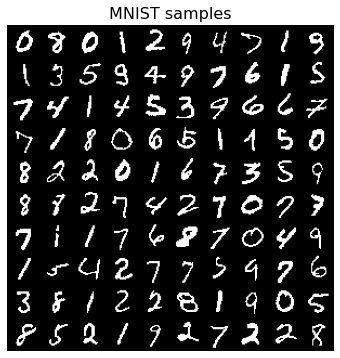

In [ ]:
train_data, test_data = load_pickle("/content/mnist.pkl", flatten=False, binarize=True)
visualize_images(train_data, "MNIST samples")

VQ-VAE model is a VAE model with discrete latent variable.  

**Reminder:**
* We define  dictionary (word book) space $\{\mathbf{e}_k\}_{k=1}^K$, where $\mathbf{e}_k \in \mathbb{R}^C$, $K$ is the size of the dictionary. 
* $\mathbf{z}_e = \text{NN}_e(\mathbf{x}, \boldsymbol{\phi})$ - continuous output of encoder network.
* $\mathbf{z}_q = \mathbf{e}_{k^*}$ is a quantized representation, where $k^* = \text{argmin}_k \| \mathbf{z} - \mathbf{e}_k \|$. It is simple nearest neighbor look up.
* Out deterministic variational posterior:
$$
  q(c = k^* | \mathbf{x}, \boldsymbol{\phi}) = \begin{cases}
  1 , \quad \text{for } k^* = \text{argmin}_k \| \mathbf{z}_e - \mathbf{e}_k \|; \\
  0, \quad \text{otherwise}.
\end{cases}
$$
* Prior distribution is uniform: $p(c) = \text{Uniform}\{1, \dots, K\}$.
* KL divergence between posterior and prior:
$$
  KL(q(c = k^* | \mathbf{x}, \boldsymbol{\phi}), p(c)) = \log K.
$$ 
* ELBO:
$$
		\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})  = \mathbb{E}_{q(c | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{e}_{c} , \boldsymbol{\theta}) - \log K =  \log p(\mathbf{x} | \mathbf{z}_q, \boldsymbol{\theta}) - \log K.
$$
* Vector quantization is non-differentiable operation. We will use **straight-through** gradient estimator (we will copy gradients from decoder input $\mathbf{z}_q$ to encoder output $\mathbf{z}_e$.

**Important modifications:**
Due to the straight-through gradient estimation of mapping from $\mathbf{z}_e$ to $\mathbf{z}_q$, the embeddings $\mathbf{e}$ receive no gradients from the ELBO. 

Therefore, in order to learn the embedding space we add l2 loss (**codebook loss**) to move the embedding vectors $\mathbf{e}$ towards the encoder outputs $\mathbf{z}_e$. 

Finally, since the volume of the embedding space is dimensionless, it can grow arbitrarily if the embeddings $\mathbf{e}$ do not train as fast as the encoder parameters. To make sure the encoder commits to an embedding and its output does not grow, we add a **commitment loss**.

Thus, the total training objective becomes:
$$
  \log p(\mathbf{x}| \mathbf{z}_q, \boldsymbol{\theta}) + \| \text{stop_gradient}(\mathbf{z}_e) - \mathbf{e}\|_2^2 + \| \mathbf{z}_e - \text{stop_gradient}(\mathbf{e})\|_2.
$$

Pay attention to the $\text{stop_gradient}(*)$ operator.


In [ ]:
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings=128, embedding_dim=16, beta=0.25):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings

        self.beta = beta

        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)

    def get_code_indices(self, x):
        x = x.permute(0, 2, 3, 1).contiguous()
        input_shape = x.shape[:-1]
        flattened = x.view(-1, self.embedding_dim)
        dist = torch.cdist(flattened, self.embedding.weight.data)
        encoding_indices = torch.argmin(dist, dim=1)

        # ====
        encoding_indices = encoding_indices.view(input_shape)
        return encoding_indices

    def get_quantized(self, encoding_indices):
        quantized = self.embedding.weight.data[encoding_indices]

        quantized = quantized.permute(0, 3, 1, 2)

        # ====
        return quantized

    def forward(self, x):
        # ====

        idx = self.get_code_indices(x)
        quantized = self.get_quantized(idx)

        codebook_loss = (x.detach() - quantized) @ (x.detach() - quantized)
        commitment_loss = torch.linalg.norm(x - quantized.detach())

        loss = codebook_loss.mean() + self.beta * commitment_loss.mean()

        quantized = x + (quantized - x).detach()

        return quantized, loss


def test_vector_quantizer():
    x = torch.zeros((1, 16, 7, 7))
    layer = VectorQuantizer()
    indices = layer.get_code_indices(x)
    assert indices.shape == (1, 7, 7)
    quantized = layer.get_quantized(indices)
    assert quantized.shape == (1, 16, 7, 7)
    quantized, loss = layer(x)
    assert quantized.shape == (1, 16, 7, 7)
    assert loss.shape == ()


test_vector_quantizer()

In [ ]:
class ConvEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        # ====
        self.net = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=64, kernel_size=3, padding=1, stride=2
            ),
            nn.ReLU(True),
            nn.Conv2d(
                in_channels=64,
                out_channels=latent_dim,
                kernel_size=3,
                padding=1,
                stride=2,
            ),
        )
        # ====

    def forward(self, x):
        return self.net(x)


class ConvDecoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        # ====

        self.net = nn.Sequential(
            nn.ConvTranspose2d(
                in_channels=latent_dim,
                out_channels=64,
                kernel_size=4,
                stride=2,
                padding=1,
            ),
            nn.ReLU(True),
            nn.ConvTranspose2d(
                in_channels=64, out_channels=2, kernel_size=4, stride=2, padding=1
            ),
        )
        # ====

    def forward(self, z):
        return self.net(z)

In [ ]:
class VQVAEModel(nn.Module):
    def __init__(
        self, ce_loss_scale=1.0, latent_dim=16, num_embeddings=64, latent_size=(7, 7)
    ):
        super().__init__()
        self.encoder = ConvEncoder(latent_dim)
        self.decoder = ConvDecoder(latent_dim)
        self.vq_layer = VectorQuantizer(num_embeddings, latent_dim)
        self.ce_loss_scale = ce_loss_scale
        self.latent_size = latent_size
        self.num_emb = num_embeddings

    def forward(self, x):
        z_e = self.encoder(x)
        quantized, vq_loss = self.vq_layer(z_e)
        decoded = self.decoder(quantized)

        # ====
        return decoded, vq_loss

    def loss(self, x):
        out, vq_loss = self.forward(x)

        ce_loss = nn.functional.cross_entropy(out.unsqueeze(2), x.long())

        # ====
        return {
            "total_loss": self.ce_loss_scale * ce_loss + vq_loss,
            "ce_loss": self.ce_loss_scale * ce_loss,
            "vq_loss": vq_loss,
        }

    def get_indices(self, x):
        z_e = self.encoder(torch.tensor(x))
        codebook_indices = self.vq_layer.get_code_indices(z_e)

        # ====
        return codebook_indices

    def prior(self, n):
        prior_dist = torch.distributions.Categorical(
            torch.tensor([1 / self.num_emb] * self.num_emb)
        )
        samples = prior_dist.sample((n, self.latent_size[0], self.latent_size[1]))
        quantized = self.vq_layer.get_quantized(samples)

        # ====
        return quantized

    def sample_from_logits(self, logits):
        samples_num = logits.size()[0]
        samples = torch.zeros(samples_num, 1, 28, 28)
        for r in range(28):
            for c in range(28):
                probs = F.softmax(logits[:, :, r, c], dim=1).squeeze(-1)
                samples[:, 0, r, c] = torch.multinomial(probs, num_samples=1).squeeze(
                    -1
                )

        # ====
        return samples.cpu().numpy()

    def sample(self, n):
        with torch.no_grad():
            prior_samples = self.prior(n)

            logits = self.decoder(prior_samples)

            samples = self.sample_from_logits(logits)

            # ====
            return samples


def test_vqvae_model():
    model = VQVAEModel()  # .cuda()
    x = torch.zeros((2, 1, 28, 28))  # .cuda()

    encoded = model.encoder(x)
    size = encoded.shape[2:]
    assert size == model.latent_size

    indices = model.get_indices(x)
    assert indices.shape == (2, 7, 7)

    losses = model.loss(x)
    assert isinstance(losses, dict)
    assert "total_loss" in losses

    quantized = model.prior(10)
    assert quantized.shape == (10, 16, *model.latent_size)

    decoded = model.decoder(quantized)
    assert decoded.shape == (10, 2, 28, 28)

    sampled = model.sample(10)
    assert sampled.shape == (10, 1, 28, 28)


test_vqvae_model()

<ipython-input-26-c9ffc9d9b503>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z_e = self.encoder(torch.tensor(x))


  0%|          | 0/20 [00:00<?, ?it/s]

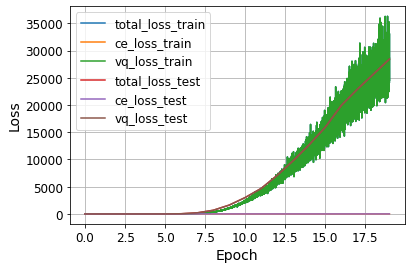

In [ ]:
BATCH_SIZE = 64
EPOCHS = 20  # < 30
LR = 3e-4  # < 1e-2
CE_SCALE = 2  # 0.01 < x < 30.0
# ====

train_data, test_data = load_pickle("/content/mnist.pkl", flatten=False, binarize=True)

model = VQVAEModel(ce_loss_scale=CE_SCALE, latent_dim=16, num_embeddings=128)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    use_cuda=USE_CUDA,
    use_tqdm=True,
    lr=LR,
)

plot_training_curves(train_losses, test_losses)

total_loss: 28424.9181
ce_loss: 0.1288
vq_loss: 28424.7893


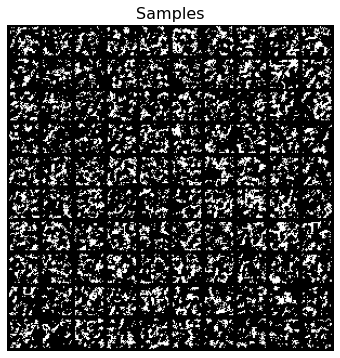

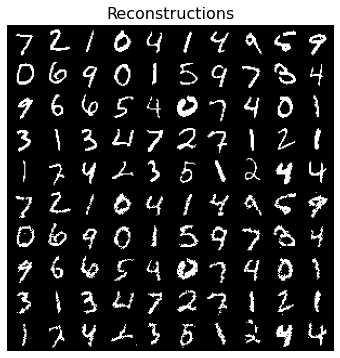

In [ ]:
# Test losses
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))

# Samples
samples = model.sample(100)
samples = samples.astype("float32")
show_samples(samples, title="Samples")

# Reconstructions
x = next(iter(test_loader))[:50].cuda()
with torch.no_grad():
    decoded, _ = model(x)
    x_recon = model.sample_from_logits(decoded)
x = x.cpu().numpy()
reconstructions = np.concatenate((x, x_recon), axis=0)
reconstructions = reconstructions.astype("float32")
show_samples(reconstructions, title="Reconstructions")

Here, we will visualize latent code indices for test images.

<ipython-input-26-c9ffc9d9b503>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z_e = self.encoder(torch.tensor(x))


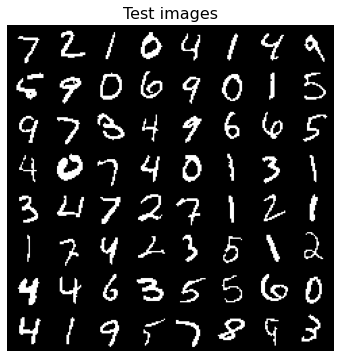

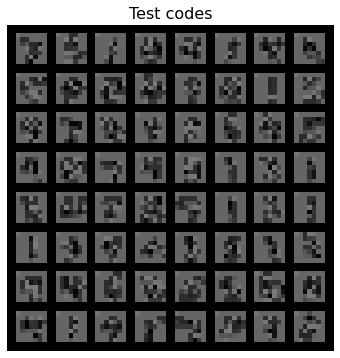

In [ ]:
test_images = next(iter(test_loader))[:100]
x = test_images.cuda()
codebook_indices = model.get_indices(x).cpu().unsqueeze(1)

show_samples(test_images, "Test images")
show_samples(codebook_indices, "Test codes")

### Training of prior autoregressive model

The samples from our VQ-VAE model is not good enough. The authors of the original VQ-VAE paper proposed to train autoregressive model in the latent space after we trained VQ-VAE model.

Remember we have discussed **ELBO surgery** and **aggregrated posterior**. Let recall what do we have in VAE:
* **Training:** we get latent variables $\mathbf{z}$ from variational posterior $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ for every object $\mathbf{x}$ and then applies decoder ($p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$). It means that in average decoder is applied to the latent variables from aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$.
* **Inference:** We apply decoder to the latent variables from prior distribution $p(\mathbf{z})$.

It means that if our aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$ and prior $p(\mathbf{z})$ is too far from each other, then we get inconsistency.

So let train to remove this inconsistency. To be concrete, let train (autoregressive) model in the latent space that will try to predict samples from the aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$.


In [ ]:
class MaskedConv2d(nn.Conv2d):
    def __init__(self, mask_type, in_channels, out_channels, kernel_size=5):
        assert mask_type in ["A", "B"]
        super().__init__(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            padding=kernel_size // 2,
        )
        self.register_buffer("mask", torch.zeros_like(self.weight))
        self.create_mask(mask_type)

    def forward(self, input):
        self.weight.data = self.weight.data * self.mask
        return super(MaskedConv2d, self).forward(input)
        # ====

    def create_mask(self, mask_type):
        height = self.weight.size()[2]
        width = self.weight.size()[3]

        if mask_type == "A":
            self.mask[:, :, height // 2 - 1, : width // 2] = 1
            self.mask[:, :, : height // 2 - 1, :] = 1
        else:
            self.mask[:, :, height // 2 - 1, : width // 2 + 1] = 1
            self.mask[:, :, : height // 2 + 1, :] = 1
        # ====


def test_masked_conv2d():
    layer = MaskedConv2d("A", 2, 2)
    assert np.allclose(layer.mask[:, :, 2, 2].numpy(), np.zeros((2, 2)))

    layer = MaskedConv2d("B", 2, 2)
    assert np.allclose(layer.mask[:, :, 2, 2].numpy(), np.ones((2, 2)))


test_masked_conv2d()

In [ ]:
class PixelCNN(nn.Module):
    def __init__(
        self,
        num_embeddings=128,
        input_shape=(7, 7),
        n_filters=32,
        kernel_size=5,
        n_layers=5,
    ):
        super().__init__()
        self.input_shape = input_shape
        self.num_embeddings = num_embeddings
        self.hidden_size = n_filters

        self.MaskedConv1 = MaskedConv2d(
            "A",
            in_channels=self.num_embeddings,
            out_channels=self.hidden_size,
            kernel_size=kernel_size,
        )
        self.Relu = nn.ReLU(True)

        self.casual_layer = nn.Sequential(
            MaskedConv2d(
                "B", self.hidden_size, self.hidden_size, kernel_size=kernel_size
            ),
            nn.ReLU(True),
        )

        self.OutLayer = MaskedConv2d(
            "B",
            self.hidden_size,
            out_channels=self.num_embeddings,
            kernel_size=kernel_size,
        )

        self.casual_list = nn.ModuleList([self.casual_layer for i in range(n_layers)])

        self.net = nn.Sequential(
            self.MaskedConv1, self.Relu, *self.casual_list, self.OutLayer
        )

    def forward(self, x):
        flattened = x.view((-1, 1))
        encodings = torch.zeros(flattened.shape[0], self.num_embeddings).cuda()
        encodings.scatter_(1, flattened, 1)
        encodings = encodings.view((-1, *self.input_shape, self.num_embeddings))
        encodings = encodings.permute((0, 3, 1, 2))
        out = self.net(encodings)
        out = out.view(-1, self.num_embeddings, 1, *self.input_shape)
        return out

    def loss(self, x):
        # ====

        output = self.forward(x)
        loss = nn.CrossEntropyLoss()
        total_loss = loss(output, x.long())

        # ====
        return {"total_loss": total_loss}

    def sample(self, n):
        samples = torch.zeros(n, 1, *self.input_shape, dtype=torch.int64).cuda()
        with torch.no_grad():
            for r in range(self.input_shape[0]):
                for c in range(self.input_shape[1]):
                    logits = self(samples)[:, :, :, r, c]
                    probs = F.softmax(logits, dim=1).squeeze(-1)
                    samples[:, 0, r, c] = torch.multinomial(
                        probs, num_samples=1
                    ).squeeze(-1)
        return samples.cpu().numpy()


def test_pixelcnn():
    model = PixelCNN().cuda()
    x = torch.zeros((1, 1, 7, 7), dtype=torch.int64).cuda()
    output = model(x)
    assert output.shape == (1, 128, 1, 7, 7)
    losses = model.loss(x)
    assert isinstance(losses, dict)
    assert "total_loss" in losses
    samples = model.sample(10)
    assert samples.shape == (10, 1, 7, 7)


test_pixelcnn()

Now we need to get our train and test samples. Our model will predict indices of the embeddings.

In [ ]:
INPUT_SHAPE = model.latent_size

train_indices = (
    model.get_indices(torch.tensor(train_data).cuda()).view(-1, 1, 7, 7).cpu().numpy()
)
test_indices = (
    model.get_indices(torch.tensor(test_data).cuda()).view(-1, 1, 7, 7).cpu().numpy()
)
# ====

assert isinstance(train_indices, np.ndarray)
assert isinstance(test_indices, np.ndarray)
assert train_indices.shape == (60000, 1, *INPUT_SHAPE)
assert test_indices.shape == (10000, 1, *INPUT_SHAPE)

<ipython-input-26-c9ffc9d9b503>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z_e = self.encoder(torch.tensor(x))


In [ ]:
EPOCHS = 10  # > 5
BATCH_SIZE = 64  # any adequate value
LR = 3e-4  # < 1e-2
N_LAYERS = 5  # < 10
N_FILTERS = 64  # < 128
# ====

prior_model = PixelCNN(
    input_shape=INPUT_SHAPE, n_filters=N_FILTERS, kernel_size=5, n_layers=N_LAYERS
)

train_loader = data.DataLoader(train_indices, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_indices, batch_size=BATCH_SIZE)
train_losses, test_losses = train_model(
    prior_model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    use_tqdm=True,
    use_cuda=USE_CUDA,
)

  0%|          | 0/10 [00:00<?, ?it/s]

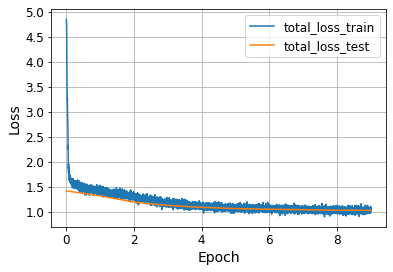

In [ ]:
plot_training_curves(train_losses, test_losses)

Now we are ready to sample from our VQ-VAE model. The difference here that we will sample our embedding indices from the PixelCNN prior model instead of the Uniform prior distribution.

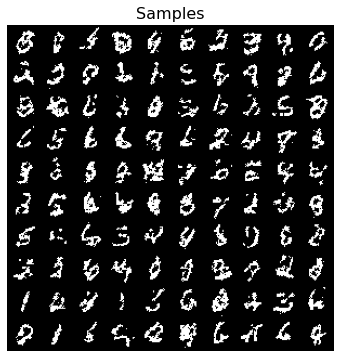

In [ ]:
N_SAMPLES = 100
indices = prior_model.sample(N_SAMPLES).squeeze(1)
quantized = model.vq_layer.get_quantized(torch.Tensor(indices).long().cuda())
logits = model.decoder(quantized)
samples = model.sample_from_logits(logits)

samples = samples.astype("float32")
show_samples(samples, title="Samples")

Here you have to get samples with good enough quality!